In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
deliveries = pd.read_csv('./data/deliveries.csv')
matches = pd.read_csv('./data/matches.csv')

In [4]:
deliveries.head()
# shows first 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
#get each column info and the NULL count
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [8]:
matches.drop(['method'], axis = 1, inplace = True)

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  umpire1       

# Most wins

In [10]:
most_wins = pd.DataFrame({'Winner' : matches['winner']})
#storing winner column in a separate data frame
most_wins_count = most_wins.value_counts() 
# counts how many times a team wins
most_wins_count

Winner                     
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [11]:
matches['winner'] = matches['winner'].replace({
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Gujarat Lions': 'Gujarat Titans',
})

In [12]:
most_wins = pd.DataFrame({'Winner' : matches['winner']})

In [13]:
most_wins_count = most_wins.value_counts()
most_wins_count

Winner                     
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Sunrisers Hyderabad            117
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Gujarat Titans                  41
Lucknow Super Giants            24
Rising Pune Supergiant          15
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

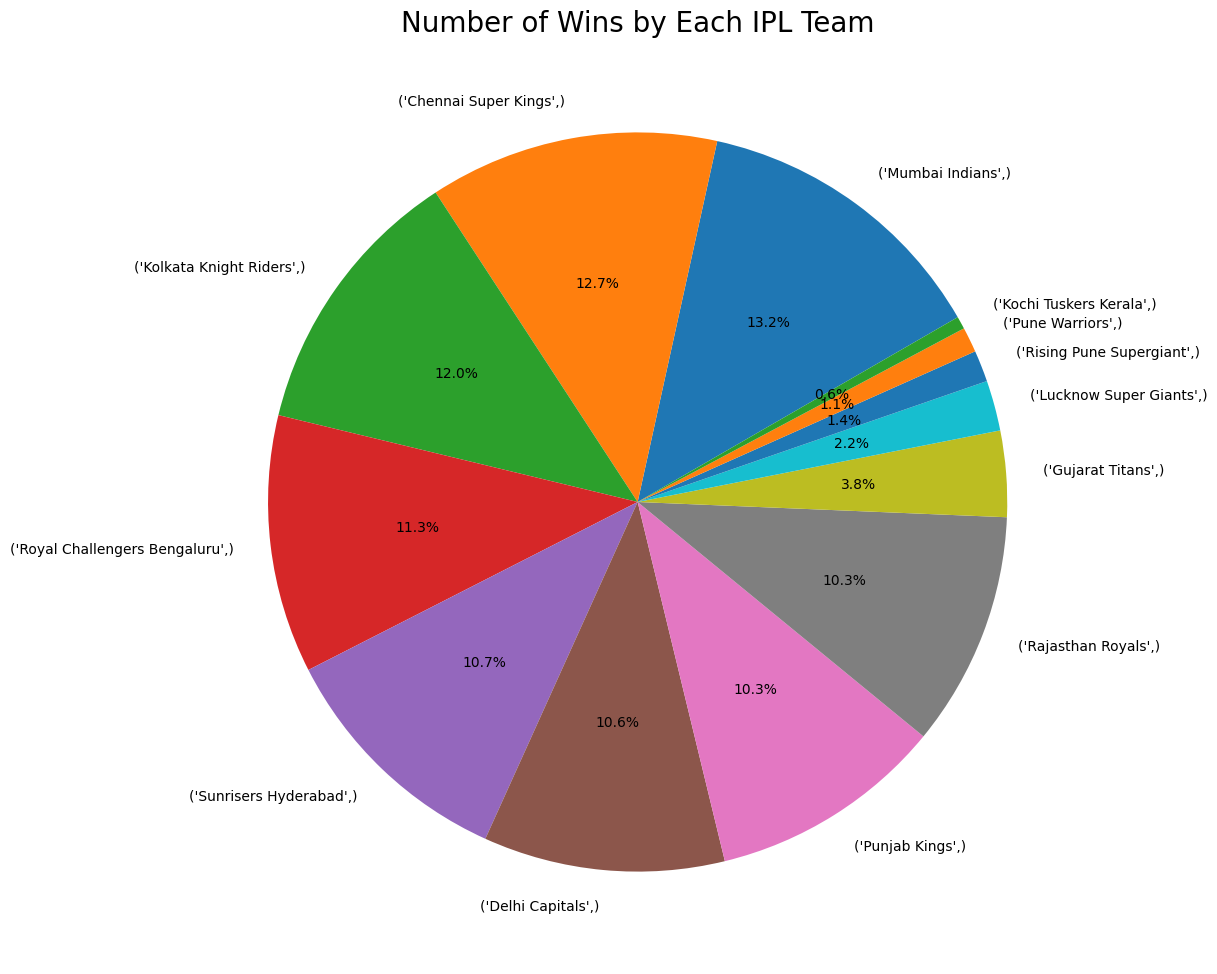

In [15]:
label = most_wins_count.index.tolist()
# lable stores the names of the team
sizes = most_wins_count.values.tolist()
# sizes stors the number of wins of teams

# pie chart
plt.figure(figsize=(20,12))
plt.pie(x = sizes, labels=label, autopct='%1.1f%%', startangle=30)
plt.title("Number of Wins by Each IPL Team", fontsize = 20)
plt.show()

# Toss decision

In [17]:
matches['toss_winner'].unique()
#winner teams

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [19]:
matches['toss_winner'] = matches['toss_winner'].replace({
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Gujarat Lions': 'Gujarat Titans',
})
matches['toss_winner'].unique()
# correcting the data

array(['Royal Challengers Bengaluru', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Titans',
       'Rising Pune Supergiant', 'Lucknow Super Giants'], dtype=object)

In [20]:
df = matches[['toss_winner', 'toss_decision']]
# df stores toss winner and their desicions

In [23]:
toss = df.value_counts().reset_index(name = 'count')
# value_counts counts the available unique pairs and reset_index stores the value in count column

In [24]:
toss

,toss_winner,toss_decision,count
0,Mumbai Indians,field,90
1,Delhi Capitals,field,89
2,Royal Challengers Bengaluru,field,86
3,Kolkata Knight Riders,field,84
4,Punjab Kings,field,77
5,Rajasthan Royals,field,76
6,Sunrisers Hyderabad,field,72
7,Chennai Super Kings,field,63
8,Sunrisers Hyderabad,bat,59
9,Chennai Super Kings,bat,59


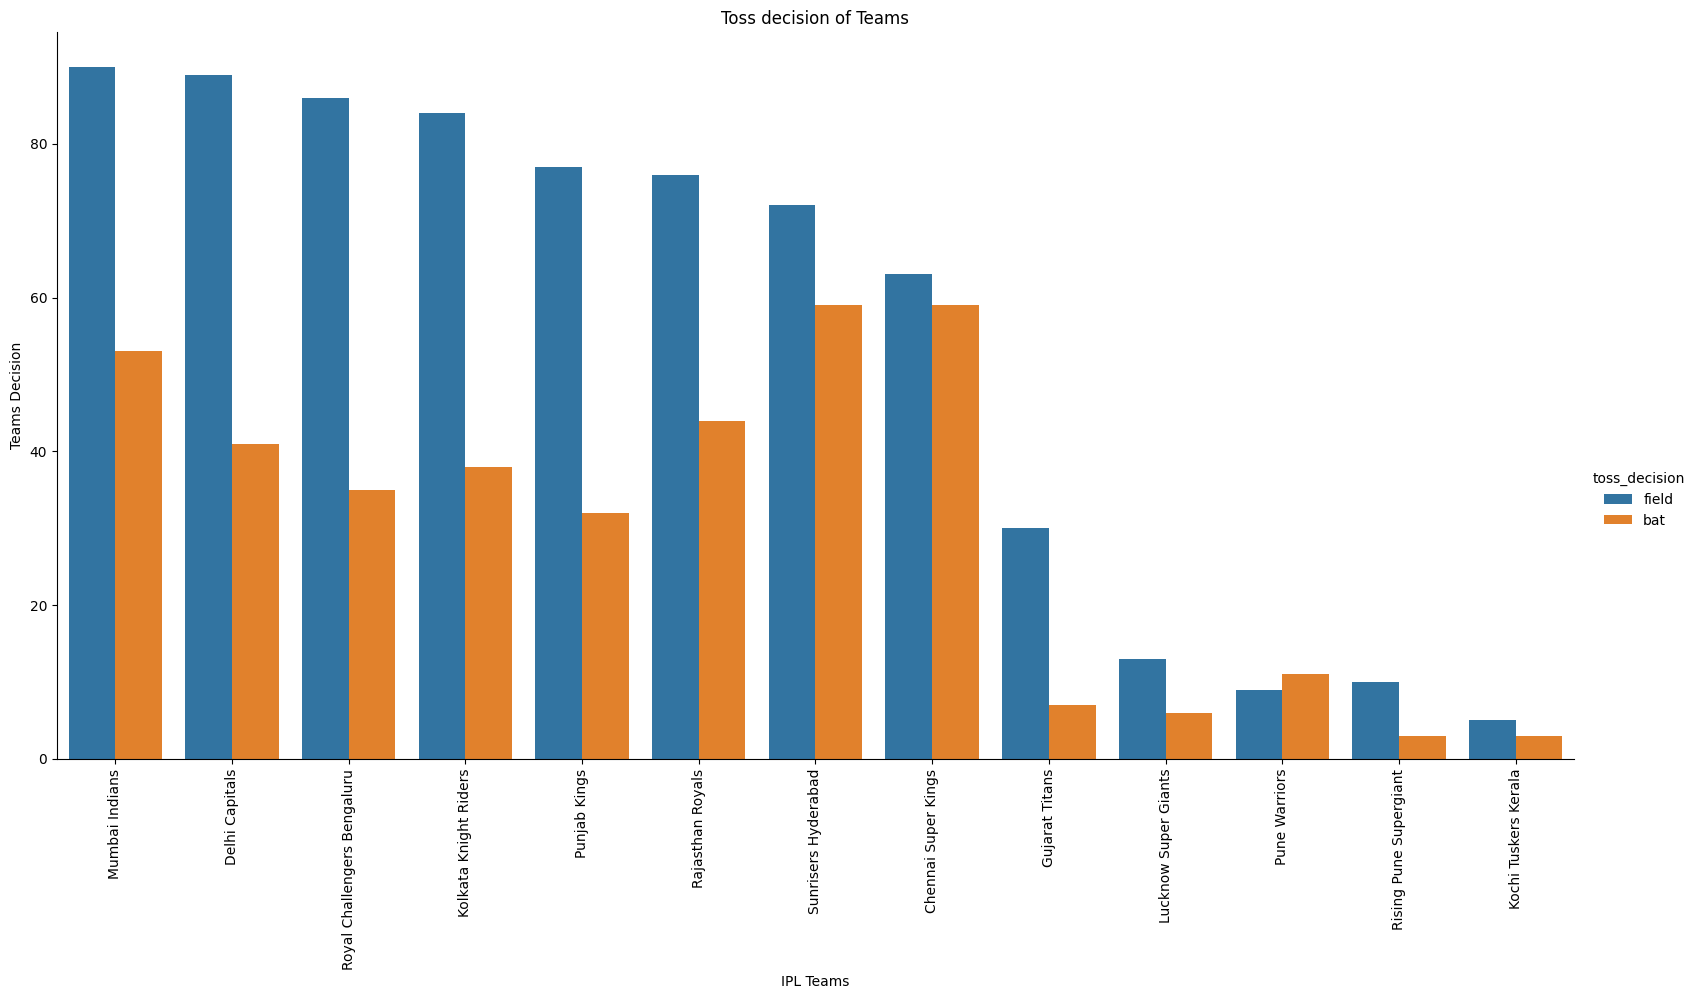

In [27]:
sns.catplot(x = 'toss_winner', y = 'count', hue = 'toss_decision', data = toss, kind = 'bar', height=8, aspect=2)
plt.xticks(rotation = 90)
plt.title('Toss decision of Teams')
plt.xlabel('IPL Teams')
plt.ylabel('Teams Decision')
plt.show()

# Toss vs Match Winner Analysis

In [38]:
toss_match_winner = matches[matches['toss_winner'] == matches['winner']]
# only store the matches where toss and match winner are same
same_match_winner = toss_match_winner[['toss_winner', 'toss_decision']].value_counts().reset_index(name = 'times_won')

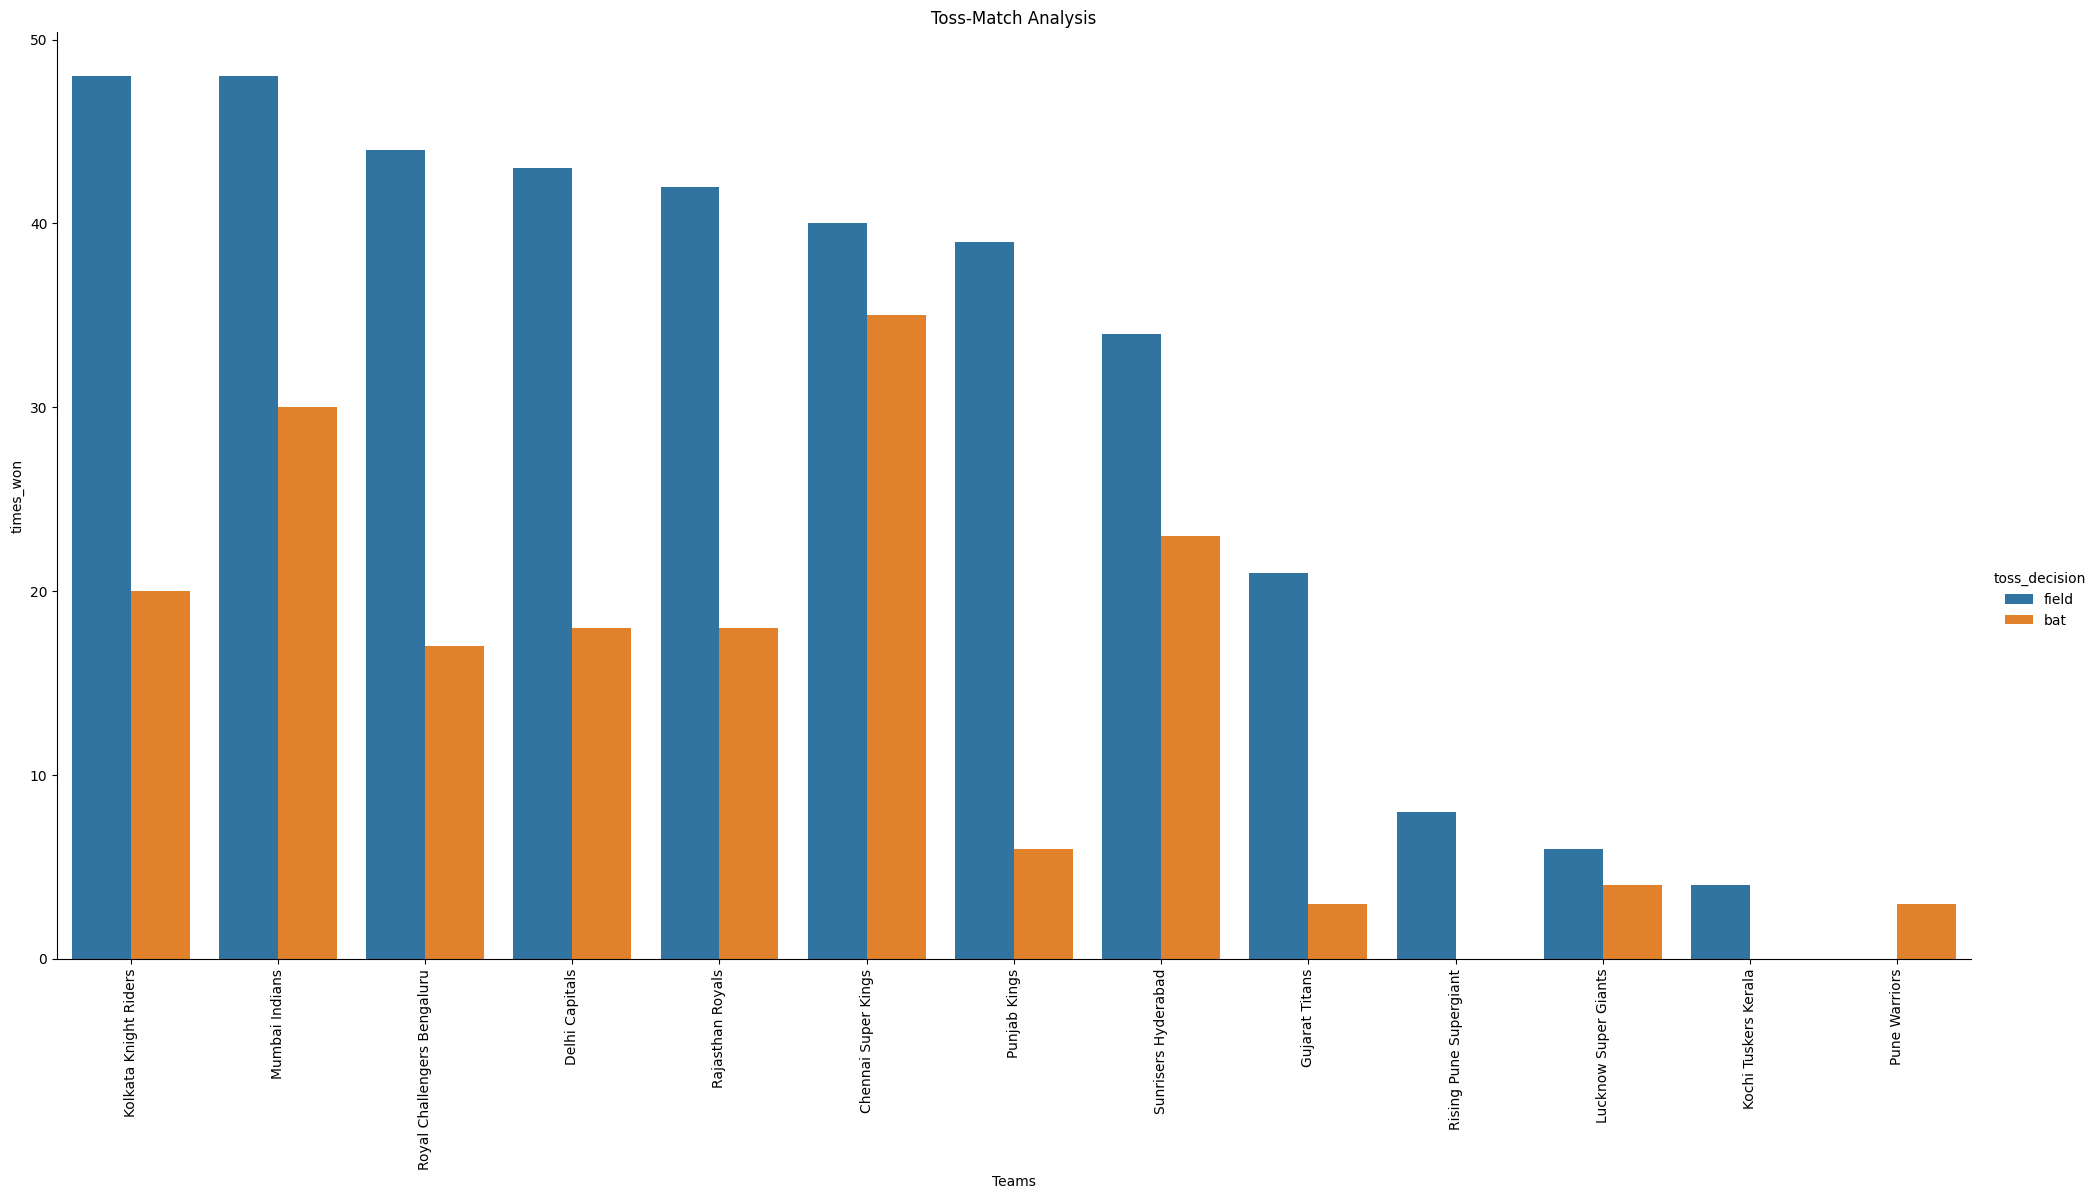

In [40]:
sns.catplot(x = 'toss_winner', y = 'times_won', hue = 'toss_decision', data = same_match_winner,kind = 'bar', height=10, aspect=2)
plt.title('Toss-Match Analysis')
plt.xlabel('Teams')
plt.ylabel('T')
plt.xticks(rotation = 90)
plt.show()
# teams win toss and the matche with their toss decision